In [393]:
import numpy as np
from tqdm import tqdm
import src.utils as utils
import matplotlib.pyplot as plt
import src.EP_model_bi as EP_model
import openjij.cxxjij as oj
%load_ext autoreload
%autoreload 2
#%matplotlib ipympl

folder_name = './results/300_MNIST_1000_bi_12_b8_best/'
epoch_idx = 5
ep_model = EP_model.EP_model()
ep_model = utils.load_obj(f'{folder_name}/ep_model.pkl')
ep_model.load_trained_param(folder_name, best_epoch=epoch_idx)

x_train, y_train, y_train_idx, x_val, y_val, y_val_idx = utils.load_data('./data/MNIST_1000')

i_s = ep_model.input_size      # input size
h_s = ep_model.hidden_size     # hidden size
o_s = ep_model.output_size # output size
N_spins = i_s + h_s + o_s
ep_model.J[ :-o_s, :-o_s ] *= 1
ep_model.H[ :i_s ] *= 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


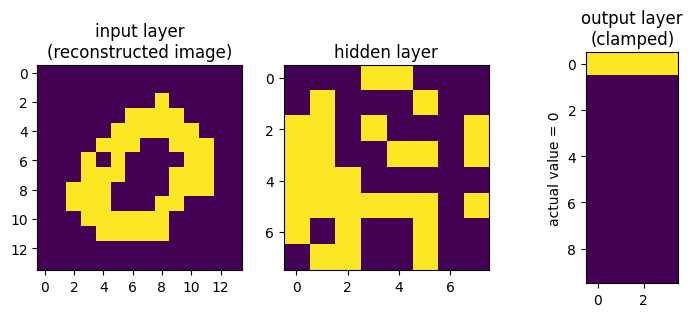

In [657]:
class_label = 0


ep_model.N_neal_temps = 2**12
ep_model.create_schedule()

output_layer_spins = np.ones(40).reshape(10, 4) * -1
output_layer_spins[class_label, :] = 1
# print(output_layer_spins)
config, _ = ep_model._forward_single_reverse(Y=output_layer_spins.flatten())
config[ep_model.ising_out_idx] = output_layer_spins.flatten()

truth = class_label

images = [config[ : i_s ].reshape(14,14), config[ i_s : i_s + h_s ].reshape(8,8), config[ -o_s: ].reshape(10,4)]
titles = ['input layer\n(reconstructed image)', 'hidden layer', 'output layer\n(clamped)']
x_tickss = [np.arange(0, 14, 2), np.arange(0, 8, 2), np.arange(0, 4, 2)]
y_tickss = [np.arange(0, 14, 2), np.arange(0, 8, 2), np.arange(0, 10, 1)]

layout = [[0,1,2]]
fig, ax = plt.subplot_mosaic(layout, figsize=(9,3))

for i in range(len(images)):
    ax[i].imshow(images[i])
    ax[i].set_title(titles[i])
    ax[i].set_xticks(x_tickss[i])
    if i==2:
        ax[i].set_ylabel(f'actual value = {truth}')
plt.show()

In [601]:
configs = np.zeros((5, len(config)))

In [602]:
configs[0] = config.copy() # 7

In [622]:
configs[1] = config.copy() # 5

In [640]:
configs[2] = config.copy() # 0

In [656]:
configs[3] = config.copy() # 3

In [658]:
configs[4] = config.copy() # 3

In [659]:
print(images[1])

[[-1 -1 -1  1  1 -1 -1 -1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [ 1  1 -1  1 -1 -1 -1  1]
 [ 1  1 -1 -1  1  1 -1  1]
 [ 1  1  1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1 -1  1]
 [ 1 -1  1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1 -1]]


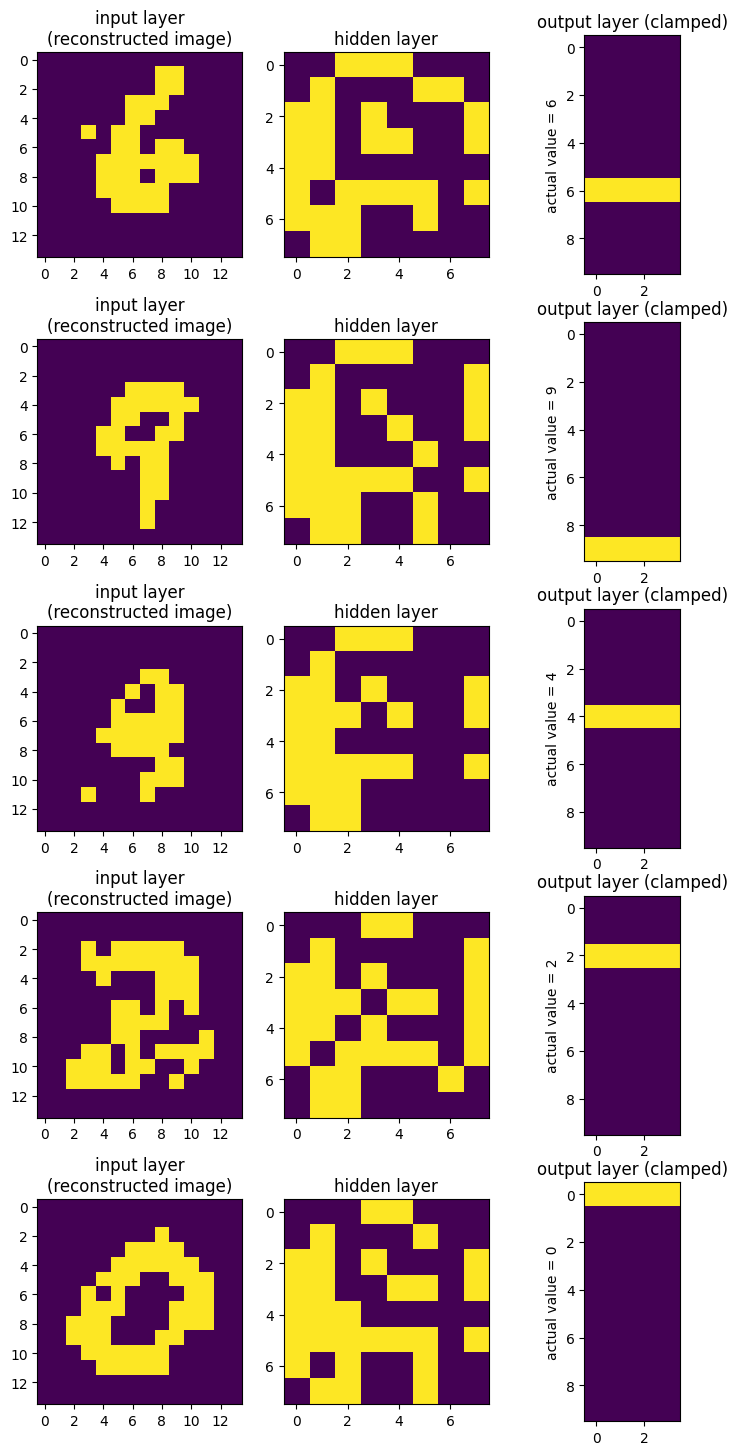

In [661]:
L = len(configs)
images = [configs[:,  : i_s ].reshape(L, 14,14), configs[:,  i_s : i_s + h_s ].reshape(L,8,8), configs[:, -o_s: ].reshape(L,10,4)]
titles = ['input layer\n(reconstructed image)', 'hidden layer', 'output layer (clamped)']
x_tickss = [np.arange(0, 14, 2), np.arange(0, 8, 2), np.arange(0, 4, 2)]
y_tickss = [np.arange(0, 14, 2), np.arange(0, 8, 2), np.arange(0, 10, 1)]

truth = [6,9,4,2,0]

layout = [[0,1,2], [3,4,5], [6,7,8], [9,10,11], [12,13,14]]
fig, ax = plt.subplot_mosaic(layout, figsize=(9,18))

for i in range(3*L):
    ax[i].imshow(images[i%3][i//3])
    ax[i].set_title(titles[i%3])
    ax[i].set_xticks(x_tickss[i%3])
    if i%3==2:
        ax[i].set_ylabel(f'actual value = {truth[i//3]}')
plt.show()